In [ ]:
#######################################################################################################################################################
# Divorce prediction
# Biao Elrick
# 00221 78-117-45-33

In [ ]:
# Ce poc est un poc de data science , il contient une partie Analyse, mining et Machine learning
# Le code est open soure à des fins personnelles et didactiques .
# Le dataset utilisé est open source et les auteurs cités
# Citation
# Yöntem, M , Adem, K , İlhan, T , Kılıçarslan, S. (2019). DIVORCE PREDICTION USING CORRELATION BASED FEATURE SELECTION AND ARTIFICIAL NEURAL NETWORKS. Nevşehir Hacı Bektaş Veli University SBE Dergisi, 9 (1), 259-273. (link)

In [ ]:
# Librairies 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,GradientBoostingClassifier
from sklearn.svm import  SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import perceptron,LogisticRegression
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.activations import relu,sigmoid,softmax,tanh



In [ ]:
# Features et signication

#Q1:If one of us apologizes when our discussion deteriorates, the discussion ends.
#Q2:I know we can ignore our differences, even if things get hard sometimes.
#Q3:When we need it, we can take our discussions with my spouse from the beginning and correct it.
#Q3 :When we need it, we can take our discussions with my spouse from the beginning and correct it.
#Q4 :When I discuss with my spouse, to contact him will eventually work.
#Q5 :The time I spent with my wife is special for us.
#Q6 :We don't have time at home as partners.
#Q7:We are like two strangers who share the same environment at home rather than family.
#Q8 :I enjoy our holidays with my wife.
#Q9 :I enjoy traveling with my wife.
#Q10 Most of our goals are common to my spouse.
#Q11 :I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
#Q12 :My spouse and I have similar values in terms of personal freedom.
#Q13 :My spouse and I have similar sense of entertainment.
#Q14 :Most of our goals for people (children, friends, etc.) are the same.
#Q15 :Our dreams with my spouse are similar and harmonious.
#Q16 :We're compatible with my spouse about what love should be.
#Q17 :We share the same views about being happy in our life with my spouse
#Q18 :My spouse and I have similar ideas about how marriage should be
#Q19 :My spouse and I have similar ideas about how roles should be in marriage
#Q20 :My spouse and I have similar values in trust.
#Q21 :I know exactly what my wife likes.
#Q22 :I know how my spouse wants to be taken care of when she/he sick.
#Q23 :I know my spouse's favorite food.
#Q24 :I can tell you what kind of stress my spouse is facing in her/his life.
#Q25 :I have knowledge of my spouse's inner world.
#Q26 :I know my spouse's basic anxieties.
#Q27 :I know what my spouse's current sources of stress are.
#Q28 :I know my spouse's hopes and wishes.
#Q29 :I know my spouse very well.
#Q30 :I know my spouse's friends and their social relationships.
#Q31 :I feel aggressive when I argue with my spouse.
#Q32 :When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’.
#Q33 :I can use negative statements about my spouse's personality during our discussions.
#Q34 :I can use offensive expressions during our discussions.
#Q35 :I can insult my spouse during our discussions.
#Q36 :I can be humiliating when we discussions.
#Q37 ;My discussion with my spouse is not calm.
#Q38 :I hate my spouse's way of open a subject.
#Q39 :Our discussions often occur suddenly.
#Q40 ;We're just starting a discussion before I know what's going on.
#Q41 :When I talk to my spouse about something, my calm suddenly breaks.
#Q42 :When I argue with my spouse, ı only go out and I don't say a word.
#Q43 :I mostly stay silent to calm the environment a little bit.
#Q44 :Sometimes I think it's good for me to leave home for a while.
#Q45 :I'd rather stay silent than discuss with my spouse.
#Q46 :Even if I'm right in the discussion, I stay silent to hurt my spouse.
#Q47 :When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
#Q48 :I feel right in our discussions.
#Q49 :I have nothing to do with what I've been accused of.
#Q50 :I'm not actually the one who's guilty about what I'm accused of.
#Q51 :I'm not the one who's wrong about problems at home.
#Q52 :I wouldn't hesitate to tell my spouse about her/his inadequacy.
#Q53 :When I discuss, I remind my spouse of her/his inadequacy.
#Q54 :I'm not afraid to tell my spouse about her/his incompetence.



In [ ]:
#Chargemeent du Dataset sur Googlecolabs

data= pd.read_csv(r"/content/divorce_data.csv",sep=';')

In [ ]:
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,4,0,0,4,0,1,0,1,0,0,0,0,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,3,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,2,1,3,3,0,2,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,1,2,1,1,0,4,3,3,2,2,3,2,4,3,1,0


In [ ]:
# shape du dataset
data.shape

# 55 features et 170 lignes


(170, 55)

In [ ]:
# Sats globales
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,1.688235,1.652941,1.835294,1.570588,1.570588,1.476471,1.652941,1.517647,1.641176,1.458824,1.388235,1.247059,1.411765,1.511765,1.629412,1.488235,1.400000,1.305882,1.494118,1.494118,2.123529,2.058824,1.805882,1.900000,1.670588,1.605882,2.088235,1.858824,2.088235,1.870588,1.994118,2.158824,2.705882,1.941176,2.458824,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,1.647082,1.468654,1.478421,1.502765,1.506697,1.504246,1.614512,1.565998,1.641027,1.554173,1.452149,1.446529,1.612041,1.504385,1.530079,1.500447,1.457078,1.467788,1.592315,1.504420,1.646955,1.623445,1.785202,1.630515,1.842228,1.798412,1.716051,1.734802,1.719496,1.796039,1.721761,1.574034,1.348447,1.684267,1.499925,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.500000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.500000,0.000000,2.000000,1.000000,2.000000,1.500000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0

In [ ]:
# info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

In [ ]:
# Nombre d'élément /type
data.dtypes.value_counts()

int64    55
dtype: int64

In [ ]:
# ecart quadratique
var= data.var()
var

Q1         2.647964
Q2         2.156944
Q3         2.003481
Q4         2.263000
Q5         2.663975
Q6         0.817299
Q7         0.807658
Q8         2.391263
Q9         2.427289
Q10        2.020745
Q11        2.712879
Q12        2.156944
Q13        2.185729
Q14        2.258301
Q15        2.270136
Q16        2.262757
Q17        2.606648
Q18        2.452349
Q19        2.692969
Q20        2.415454
Q21        2.108737
Q22        2.092447
Q23        2.598677
Q24        2.263174
Q25        2.341142
Q26        2.251340
Q27        2.123077
Q28        2.154403
Q29        2.535468
Q30        2.263279
Q31        2.712461
Q32        2.635573
Q33        3.186947
Q34        2.658580
Q35        3.393804
Q36        3.234285
Q37        2.944831
Q38        3.009537
Q39        2.956666
Q40        3.225757
Q41        2.964462
Q42        2.477584
Q43        1.818308
Q44        2.836756
Q45        2.249774
Q46        1.881796
Q47        2.518065
Q48        1.293561
Q49        2.284894
Q50        1.974278


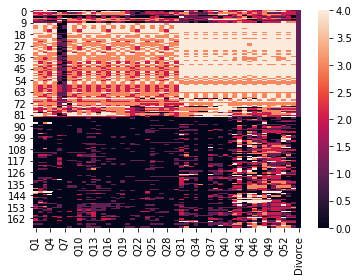

In [ ]:
#
sb.heatmap(data)

In [ ]:
#valeurs manquantes
#sb.heatmap(data.isna())
data.isna().mean()

Q1         0.0
Q2         0.0
Q3         0.0
Q4         0.0
Q5         0.0
Q6         0.0
Q7         0.0
Q8         0.0
Q9         0.0
Q10        0.0
Q11        0.0
Q12        0.0
Q13        0.0
Q14        0.0
Q15        0.0
Q16        0.0
Q17        0.0
Q18        0.0
Q19        0.0
Q20        0.0
Q21        0.0
Q22        0.0
Q23        0.0
Q24        0.0
Q25        0.0
Q26        0.0
Q27        0.0
Q28        0.0
Q29        0.0
Q30        0.0
Q31        0.0
Q32        0.0
Q33        0.0
Q34        0.0
Q35        0.0
Q36        0.0
Q37        0.0
Q38        0.0
Q39        0.0
Q40        0.0
Q41        0.0
Q42        0.0
Q43        0.0
Q44        0.0
Q45        0.0
Q46        0.0
Q47        0.0
Q48        0.0
Q49        0.0
Q50        0.0
Q51        0.0
Q52        0.0
Q53        0.0
Q54        0.0
Divorce    0.0
dtype: float64

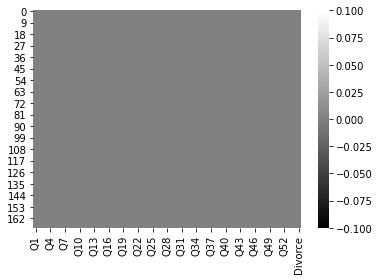

In [ ]:
#
sb.heatmap(data.isna(),cmap="gray")

In [ ]:
# Nous n'avons pas de valeurs manquantes dans ce dataset nous n'avons pas à les traiter


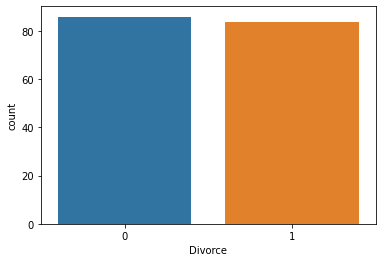

In [ ]:
sb.countplot(x=data["Divorce"])

In [ ]:
#il y a plus de personnes qui ne divorcent pas que de personnes qui divorcent.

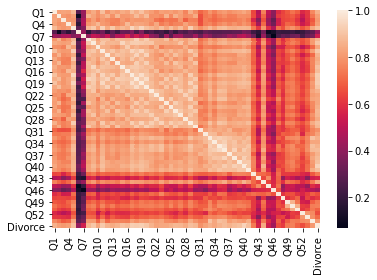

In [ ]:
# Matrice de Cor rélation
sb.heatmap(data.corr())

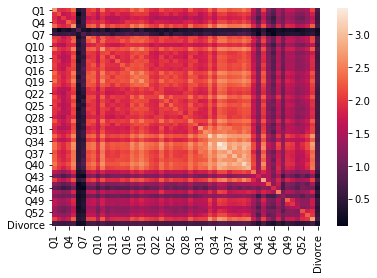

In [ ]:
# Matrice de covariance
sb.heatmap(data.cov(),cbar=True)

In [ ]:
# Il y a de fortes corelations entre toutes les variables
# il existe des relations lineaires entre ces features et le target: divorce 

In [ ]:
# Prediction 


In [ ]:
# Approche classique :ML

In [ ]:
arbre= DecisionTreeClassifier()
forest=RandomForestClassifier()
xgboost=GradientBoostingClassifier()
svm= SVC()
svm_lineaire=LinearSVC()
knn=KNeighborsClassifier()
lreg=LogisticRegression()

In [ ]:
modeles={"1":DecisionTreeClassifier(),"2":RandomForestClassifier(),"3":GradientBoostingClassifier(),"4":SVC(),"5":LinearSVC(),"6":KNeighborsClassifier(),"7":LogisticRegression()}
for i in modeles.values():
  print(i)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
GradientBoostingClassifier

In [ ]:
#Echantillonage des données
def ech_norm(data):
  train,test=train_test_split(data,test_size=0.3)
  xtrain=train.iloc[:,:-1]
  xtest=test.iloc[:,:-1]
  ytest=test["Divorce"]
  ytrain=train["Divorce"]
 
  return xtrain,ytrain,xtest,ytest
  


In [ ]:
 
xtrain,ytrain,xtest,ytest=ech_norm(data)
 

modele :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
score: 1.0
ypredict
[0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 0]
accuracy score 0.9411764705882353
conf matrice [[27  2]
 [ 1 21]]
conf matrice               precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.91      0.95      0.93        22

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51

courbe d'apprentissage


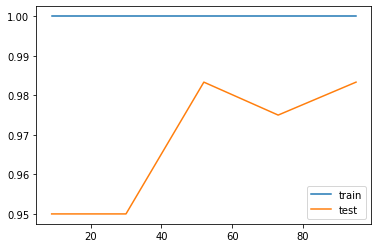

modele :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
score: 1.0
ypredict
[0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 0]
accuracy score 0.9411764705882353
conf matrice [[28  3]
 [ 0 20]]
conf matrice               precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.87      1.00      0.93        20

    accuracy                           0.94        51
   macro avg       0.

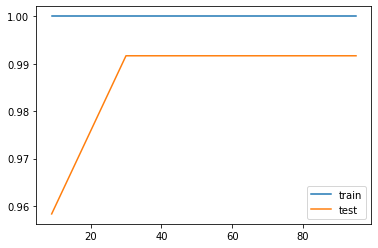

modele :  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
score: 1.0
ypredict
[0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 0]
accuracy score 0.9411764705882353
conf matrice [[28  3]
 [ 0 20]]
conf matrice               precision    recall  f1-score   support

           0       1.00      0.90 

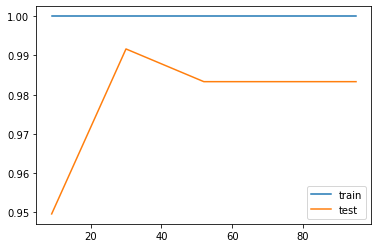

modele :  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
score: 0.9915966386554622
ypredict
[0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 0]
accuracy score 0.9411764705882353
conf matrice [[28  3]
 [ 0 20]]
conf matrice               precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.87      1.00      0.93        20

    accuracy                           0.94        51
   macro avg       0.93      0.95      0.94        51
weighted avg       0.95      0.94      0.94        51

courbe d'apprentissage


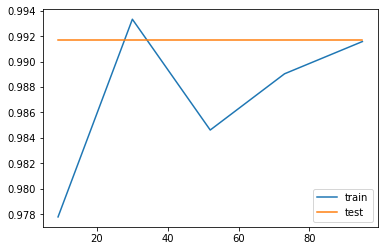

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


modele :  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
score: 1.0
ypredict
[0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 0]
accuracy score 0.9411764705882353
conf matrice [[28  3]
 [ 0 20]]
conf matrice               precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.87      1.00      0.93        20

    accuracy                           0.94        51
   macro avg       0.93      0.95      0.94        51
weighted avg       0.95      0.94      0.94        51

courbe d'apprentissage


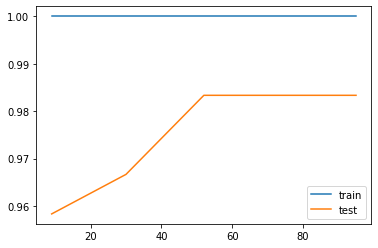

modele :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
score: 0.9915966386554622
ypredict
[0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 0]
accuracy score 0.9411764705882353
conf matrice [[28  3]
 [ 0 20]]
conf matrice               precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.87      1.00      0.93        20

    accuracy                           0.94        51
   macro avg       0.93      0.95      0.94        51
weighted avg       0.95      0.94      0.94        51

courbe d'apprentissage


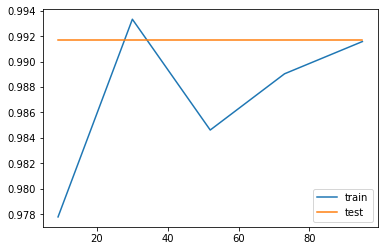

modele :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
score: 1.0
ypredict
[0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 0]
accuracy score 0.9411764705882353
conf matrice [[28  3]
 [ 0 20]]
conf matrice               precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.87      1.00      0.93        20

    accuracy                           0.94        51
   macro avg       0.93      0.95      0.94        51
weighted avg       0.95      0.94      0.94        51

courbe d'apprentissage


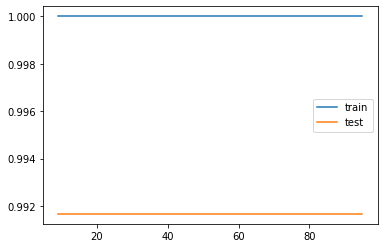

In [ ]:
for i in modeles.values():
  i.fit(xtrain,ytrain)
  print("modele : ",i)
  print("score:",i.score(xtrain,ytrain))
  print("ypredict")
  y=i.predict(xtest)
  print(y)
  print("accuracy score", accuracy_score(y,ytest))
  print("conf matrice", confusion_matrix(y,ytest))
  print("conf matrice", classification_report(y,ytest))
  print("courbe d'apprentissage")
  from sklearn.model_selection import learning_curve
  gamma,train_score,val_score=learning_curve(i,xtrain,ytrain,cv=5)  
  plt.plot(gamma,train_score.mean(axis=1),label="train")
  plt.plot(gamma,val_score.mean(axis=1),label="test")

  plt.legend()
  plt.show()

  

In [ ]:
 # Les meilleurs modeles  dans l'ordre sont: 
 #randomforest
 #gradientboosting
 #decision tree
 # Les autres modèles sont soit en overfiting ou en underfiting 
 